Question 4: Hyperparameter Tuning with RandomizedSearchCV<br>
Task: Use RandomizedSearchCV to optimize hyperparameters for a RandomForestClassifier.

Best hyperparameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 69}
Best cross-validation score from RandomizedSearchCV: 0.9536
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
400 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
201 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.l

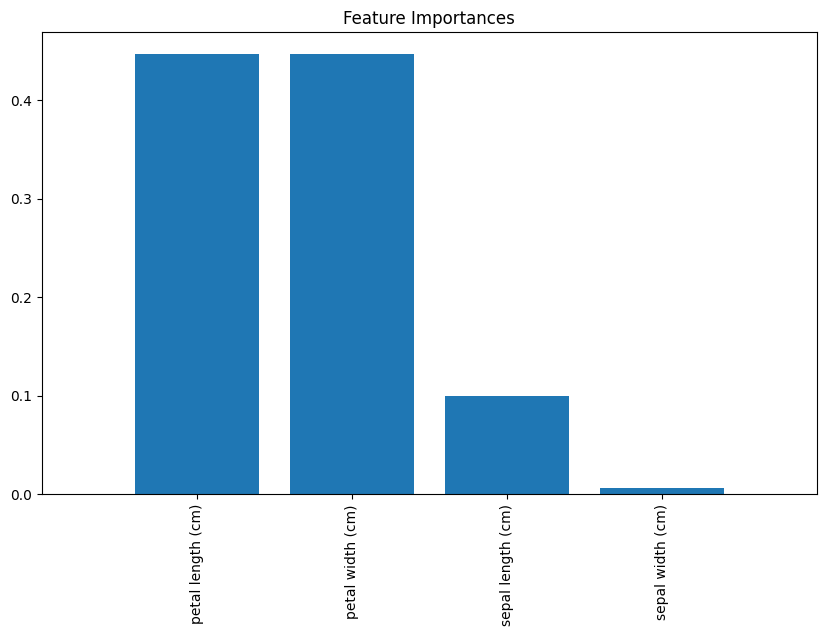

In [2]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.stats import randint

# Load the Iris dataset (a classic classification problem)
data = load_iris()
X = data.data
y = data.target

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Step 3: Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40],  # Max depth of trees
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 20),   # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
}

# Step 4: Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=100, cv=10, n_jobs=-1, random_state=42, scoring='accuracy')
random_search.fit(X_train, y_train)

# Step 5: Print the best parameters and the corresponding score
print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best cross-validation score from RandomizedSearchCV: {random_search.best_score_:.4f}")

# Step 6: Evaluate the best model on the test set
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Classification report
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# Step 7: Feature Importance (optional visualization)
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualizing feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(data.feature_names)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
